In [1]:
import ants
import os
import glob
import nibabel as nib
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

from monai import transforms


/home/fehrdelt/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
BETTIK_DIR = "/bettik/PROJECTS/pr-gin5_aini/fehrdelt/"
#BETTIK_DIR = "/home/theotime/bettik/"

In [3]:
os.sys.path.append(BETTIK_DIR+"Code/Dataset_Preprocessing")
import register_and_resample_dataset

(0.9375, 0.9375, 1.1999973)
(0.9375, 0.9375, 1.2000039)
(0.9375, 0.9375, 1.1999971)
(0.93750006, 0.93750036, 1.1999966)


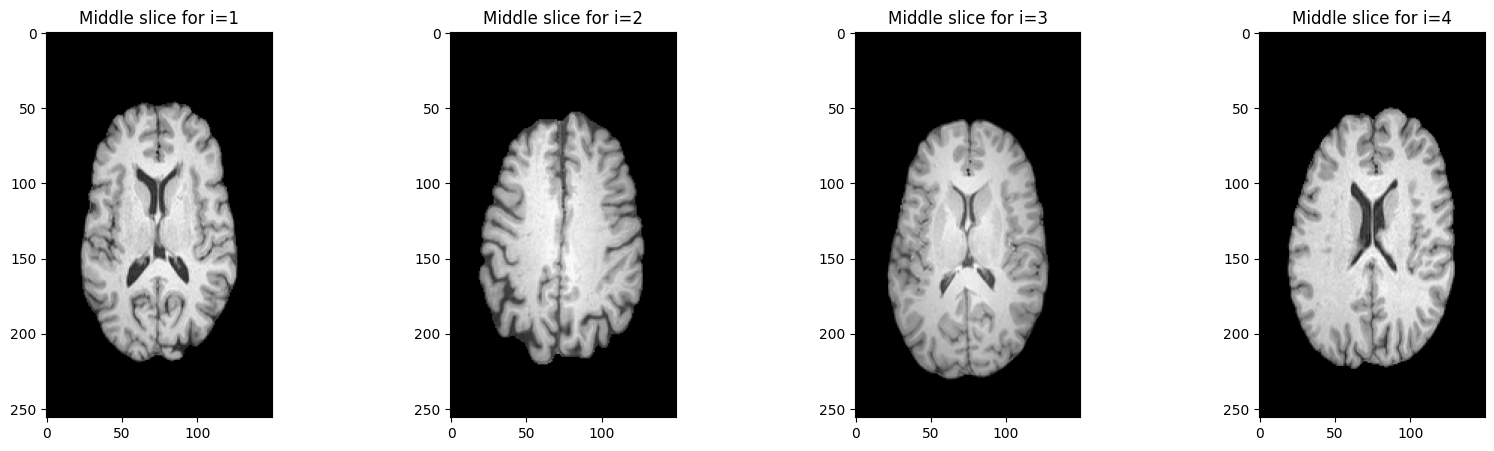

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, file in enumerate(os.listdir(BETTIK_DIR+"datasets/dataset_IXI_T1_brain_extraction/")):
    
    if i in [1, 2, 3, 4]:
        img = nib.load(BETTIK_DIR + "datasets/dataset_IXI_T1_brain_extraction/" + file)
        print(img.header.get_zooms())
        for idx, ax in enumerate(axes):
            if idx == i - 1:
                ax.imshow(img.get_fdata()[:, img.get_fdata().shape[1] // 2+40], cmap="gray")
                ax.set_title(f"Middle slice for i={i}")
plt.show()


In [5]:
dataset_folder = BETTIK_DIR + "datasets/dataset_IXI_T1_brain_extraction"
output_folder = BETTIK_DIR + "datasets/dataset_IXI_T1_brain_extraction_registered_resampled"

register_and_resample_dataset.register_and_resample_dataset(reference_image_path=dataset_folder+"/IXI002-Guys-0828-T1.nii.gz", 
                                                            dataset_folder=dataset_folder, 
                                                            output_folder=output_folder, 
                                                            spacing=(1.0, 1.0, 1.0))

Saved: /bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/dataset_IXI_T1_brain_extraction_registered_resampled/IXI002-Guys-0828-T1_registered_resampled.nii
Saved: /bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/dataset_IXI_T1_brain_extraction_registered_resampled/IXI012-HH-1211-T1_registered_resampled.nii
Saved: /bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/dataset_IXI_T1_brain_extraction_registered_resampled/IXI013-HH-1212-T1_registered_resampled.nii
Saved: /bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/dataset_IXI_T1_brain_extraction_registered_resampled/IXI014-HH-1236-T1_registered_resampled.nii
Saved: /bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/dataset_IXI_T1_brain_extraction_registered_resampled/IXI015-HH-1258-T1_registered_resampled.nii
Saved: /bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/dataset_IXI_T1_brain_extraction_registered_resampled/IXI016-Guys-0697-T1_registered_resampled.nii
Saved: /bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/dataset_IXI_T1_brain_extraction_reg

### Older stuff

319
(256, 256, 150)
[[ 2.97539891e-03 -7.98818772e-04  1.19999695e+00 -8.81419296e+01]
 [-9.29314554e-01  1.23577595e-01  3.91007029e-03  1.26289764e+02]
 [ 1.23579539e-01  9.29319203e-01  5.11538994e-04 -1.21623741e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(0.9375, 0.9375, 1.2000034)


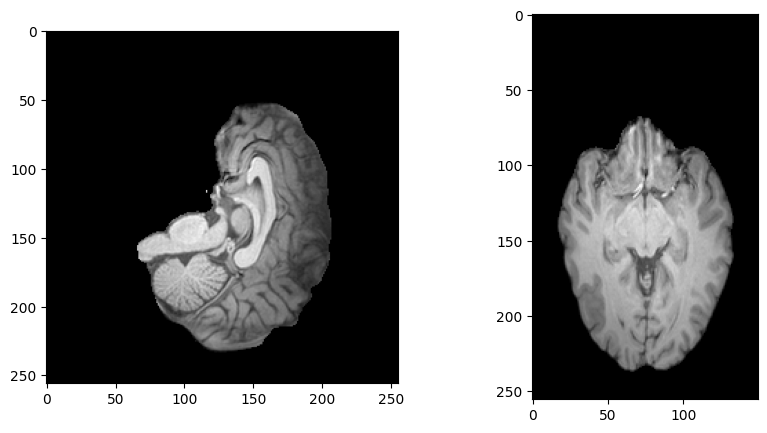

In [10]:
for i, file in enumerate(os.listdir(BETTIK_DIR+"datasets/dataset_IXI_T1_brain_extraction/")):
    if i==319:
        print(i)
        img = nib.load(BETTIK_DIR+"datasets/dataset_IXI_T1_brain_extraction/"+file)
        print(img.shape)
        print(img.affine)
        print(img.header.get_zooms()[:3])

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        ax1.imshow(img.get_fdata()[:,:,img.get_fdata().shape[2]//2], cmap="grey")
        ax2.imshow(img.get_fdata()[:,img.get_fdata().shape[1]//2, :], cmap="grey")


In [ ]:
for i, file in enumerate(os.listdir(BETTIK_DIR+"datasets/Dallas_Computed_ADC_extracted_brain_registered_rotated_padded/")):
    if i==132:
        
        img = nib.load(BETTIK_DIR+"datasets/Dallas_Computed_ADC_extracted_brain_registered_rotated_padded/"+file)
        print(img.shape)

        #padded = np.zeros((128,128,60))
        #padded[0:img.shape[0], 0:img.shape[1], 0:img.shape[2]] = img.get_fdata()

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        ax1.imshow(img.get_fdata()[:,:,img.get_fdata().shape[2]//2], cmap="grey")
        ax2.imshow(img.get_fdata()[:,img.get_fdata().shape[1]//2, :], cmap="grey")

In [ ]:
affine = nib.load(BETTIK_DIR+"datasets/Dallas_Computed_ADC_extracted_brain_registered_rotated/"+"sub-12_ses-wave1_ADC.nii.gz").affine

for file in tqdm(os.listdir(BETTIK_DIR+"datasets/Dallas_Computed_ADC_extracted_brain_registered_rotated/")):

    img = nib.load(BETTIK_DIR+"datasets/Dallas_Computed_ADC_extracted_brain_registered_rotated/"+file)
    #print(img.shape)

    padded_img = np.zeros((128,128,60))
    padded_img[0:img.shape[0], 0:img.shape[1], 0:img.shape[2]] = img.get_fdata()

    empty_header = nib.Nifti1Header()
    
    
    resized_img = nib.Nifti1Image(padded_img, affine, empty_header)
    nib.save(resized_img, BETTIK_DIR+"datasets/Dallas_Computed_ADC_extracted_brain_registered_rotated_padded/"+file)


In [ ]:
pad_pipeline = transforms.Compose([
    transforms.LoadImage(),
    transforms.EnsureChannelFirst(),
    transforms.ResizeWithPadOrCrop(spatial_size=(128, 128, 145)),
])

In [ ]:
pad_pipeline = transforms.Compose([
    transforms.LoadImage(),
    transforms.EnsureChannelFirst(),
    transforms.ResizeWithPadOrCrop(spatial_size=(174, 174, 145)),
    transforms.Resize(spatial_size=(128, 128, 107))
])

input_directory = BETTIK_DIR+"datasets/ADC_Human_Connectome_Project_Young_Adult_HCP-YA/"
output_directory = BETTIK_DIR+"datasets/ADC_Human_Connectome_Project_Young_Adult_HCP-YA_resized128/"

affine = nib.load(input_directory+"100610.nii.gz").affine

for file in tqdm(os.listdir(input_directory)):
    if not os.path.isfile(output_directory+file):
        padded_img = pad_pipeline(input_directory+file)
        
        empty_header = nib.Nifti1Header()
        
        
        resized_img = nib.Nifti1Image(padded_img[0,:,:,:], affine, empty_header)
        nib.save(resized_img, output_directory+file)

In [ ]:


def register_nifti_files(fixed_reference, dataset_path, output_path):
    """
    Registers all NIfTI files in the dataset_path folder to the same space using ANTs.

    Parameters:
    - dataset_path: Path to the folder containing NIfTI files.
    - output_path: Path to save the registered NIfTI files.
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Get all NIfTI files in the dataset_path
    nifti_files = glob.glob(os.path.join(dataset_path, "*.nii*"))

    if not nifti_files:
        print("No NIfTI files found in the dataset path.")
        return

    # Use the first file as the fixed image (reference)
    fixed_image = ants.image_read(fixed_reference)

    for i, moving_file in enumerate(nifti_files):
        print(f"file {i} of {len(nifti_files)}")
        output_filepath = os.path.join(output_path, os.path.basename(moving_file))
        
        if not os.path.isfile(output_filepath):
            moving_image = ants.image_read(moving_file)
    
            # Perform registration
            registration = ants.registration(fixed=fixed_image, moving=moving_image, type_of_transform='Rigid')
    
            # Save the registered image
            
            ants.image_write(registration['warpedmovout'], output_filepath)
    
            print(f"Registered {moving_file} and saved to {output_filepath}")
        else:
            print("skipped registration already done")


In [ ]:
register_nifti_files(fixed_reference=registered_dallas_dataset_path+"sub-12_ses-wave1_ADC.nii.gz", dataset_path=unregistered_HCP_YA_path, output_path=output_path)